In [1]:
import warnings
warnings.simplefilter('ignore')

import sys, os
sys.path.append('../../codes/')

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import logisticRegression as lr
import data_jupyter as data

#-------------------
# 1. データの作成
myData = data.classification(negLabel=0,posLabel=1)
myData.makeData(dataType=1)
#-------------------

#-------------------
# 2. データを学習と評価用に分割
dtrNum = int(len(myData.X)*0.9)  # 学習データ数
# 学習データ（全体の90%）
Xtr = myData.X[:dtrNum]
Ytr = myData.Y[:dtrNum]

# 評価データ（全体の10%）
Xte = myData.X[dtrNum:]
Yte = myData.Y[dtrNum:]
#-------------------

#-------------------
# 3. 入力データの標準化
xMean = np.mean(Xtr,axis=0)
xStd = np.std(Xtr,axis=0)
Xtr = (Xtr-xMean)/xStd
Xte = (Xte-xMean)/xStd
#-------------------

#-------------------
# 4. ロジスティックモデルの学習と評価
myModel = lr.logisticRegression(Xtr,Ytr)

trLoss = []
teLoss = []

for ite in range(1001):
    trLoss.append(myModel.CE(Xtr,Ytr))
    teLoss.append(myModel.CE(Xte,Yte))
    
    if ite%100==0:
        print(f"反復:{ite}")
        print(f"モデルパラメータ:\nw={myModel.w},\nb={myModel.b}")
        print(f"平均交差エントロピー損失={myModel.CE(Xte,Yte):.2f}")
        print(f"正解率={myModel.accuracy(Xte,Yte):.2f}")
        print("----------------")
        
    # モデルパラメータの更新
    myModel.update(alpha=1)
#-------------------




反復:0
モデルパラメータ:
w=[[-0.24106767]],
b=[[-0.07592078]]
平均交差エントロピー損失=0.78
正解率=0.11
----------------
反復:100
モデルパラメータ:
w=[[4.01467288]],
b=[[3.63465009]]
平均交差エントロピー損失=0.10
正解率=0.97
----------------
反復:200
モデルパラメータ:
w=[[5.11969532]],
b=[[4.53429891]]
平均交差エントロピー損失=0.08
正解率=0.97
----------------
反復:300
モデルパラメータ:
w=[[5.83867482]],
b=[[5.11368415]]
平均交差エントロピー損失=0.07
正解率=0.97
----------------
反復:400
モデルパラメータ:
w=[[6.38303095]],
b=[[5.54865999]]
平均交差エントロピー損失=0.07
正解率=0.97
----------------
反復:500
モデルパラメータ:
w=[[6.82515822]],
b=[[5.89964229]]
平均交差エントロピー損失=0.07
正解率=0.97
----------------
反復:600
モデルパラメータ:
w=[[7.19926928]],
b=[[6.19509257]]
平均交差エントロピー損失=0.07
正解率=0.97
----------------
反復:700
モデルパラメータ:
w=[[7.52446638]],
b=[[6.45083184]]
平均交差エントロピー損失=0.07
正解率=0.97
----------------
反復:800
モデルパラメータ:
w=[[7.81258822]],
b=[[6.67662072]]
平均交差エントロピー損失=0.07
正解率=0.97
----------------
反復:900
モデルパラメータ:
w=[[8.07152016]],
b=[[6.87893222]]
平均交差エントロピー損失=0.07
正解率=0.97
----------------
反復:1000
モデルパラメータ:
w=[[8.30679997]],
b=[[

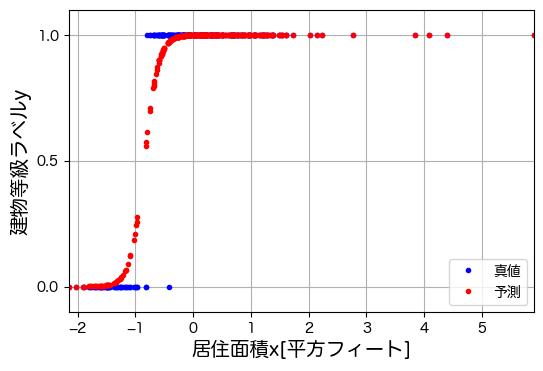

In [4]:
#-------------------
# 5. 真値と予測値のプロット
if Xtr.shape[1] == 1:
    myModel.plotModel1D(X=Xtr,Y=Ytr,xLabel=myData.xLabel,yLabel=myData.yLabel)
elif Xtr.shape[1] == 2:
    myModel.plotModel2D(X=Xtr,Y=Ytr,xLabel=myData.xLabel,yLabel=myData.yLabel)
#-------------------

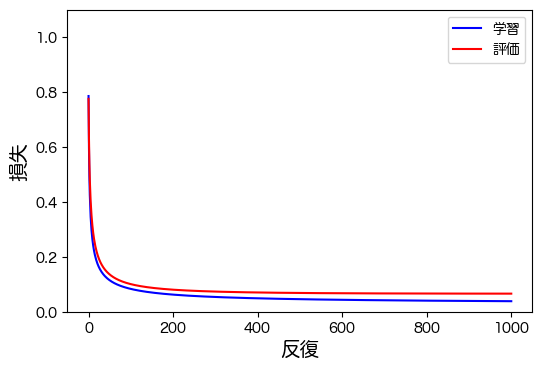

In [5]:

#-------------------
# 6. 学習と評価損失のプロット
myModel.plotEval(trLoss,teLoss)
#myModel.plotLoss(trLoss,teLoss)
#-------------------